## 使用卷积网络给狗狗图片分类 ##
## 图像数据的输入工作 ##
&emsp;&emsp;训练网络之前，先准备数据，把不同目录中的图像全部都整理到同一个目录当中。并且将它们都整合到**python**特征张量数组里面，然后进行乱序排序。那么这个输入结构应该是4D张量，形状是（样本，图像高度，图像宽度，颜色深度）\
&emsp;&emsp;相对的，也要把目录名整理到一个同样长度的1D标签张量当中，次序和特征张量一致。。
   1. 数据的输入\
&emsp;&emsp;先显示以下**images**目录下面的狗的种类子目录：

In [26]:
import numpy as np
import pandas as pd
import os
print(os.listdir("../archive/stanford_dogs/images/Images/"))

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [27]:
# 本示例咱只处理这10中狗吧
dir = "../archive/stanford_dogs/images/Images/"
chihuahua_dir = dir+'n02085620-Chihuahua' # 吉娃娃
japanese_spaniel_dir = dir+'n02085782-Japanese_spaniel' # 日本种
maltese_dir = dir+'n02085936-Maltese_dog' # 马尔济斯犬
pekinese_dir = dir+'n02086079-Pekinese' # 北京狮子狗
shihtzu_dir = dir+'n02086240-Shih-Tzu' # 西施犬
blenheim_spaniel_dir = dir+'n02086646-Blenheim_spaniel' # 英国可卡犬
papillon_dir = dir+'n02086910-papillon' # 蝴蝶犬
toy_terrier_dir = dir+'n02087046-toy_terrier' # 玩具猎狐犬
afghan_hound_dir = dir+'n02088094-Afghan_hound' # 阿富汗猎犬
basset_dir = dir+'n02088238-basset' # 巴吉度猎犬

下面的部分代码，我们将这10个狗种类的子目录中的图像和标签值读入到X，y数据就当中：

In [28]:
import cv2 # 导入Open CV工具箱
X = []
y_label = []
imgsize = 150
# 定义一个函数读入狗狗图片
def training_data(label,data_dir):
    print("正在读入：",data_dir)
    for img in os.listdir(data_dir):
        path = os.path.join(data_dir,img)
        # cv2.imread()方法是用来读取图片的，其中的参数IMREAD_COLOR则是读入彩色图片
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        # 给刚才读入变量img的图片重新定义尺寸，长和宽定义为150px
        img = cv2.resize(img,(imgsize,imgsize))
        X.append(np.array(img))
        y_label.append(str(label))
# 读入10个目录中的狗狗图片
training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shihtzu',shihtzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
training_data('afghan_hound',afghan_hound_dir)
training_data('basset',basset_dir)

正在读入： ../archive/stanford_dogs/images/Images/n02085620-Chihuahua
正在读入： ../archive/stanford_dogs/images/Images/n02085782-Japanese_spaniel
正在读入： ../archive/stanford_dogs/images/Images/n02085936-Maltese_dog
正在读入： ../archive/stanford_dogs/images/Images/n02086079-Pekinese
正在读入： ../archive/stanford_dogs/images/Images/n02086240-Shih-Tzu
正在读入： ../archive/stanford_dogs/images/Images/n02086646-Blenheim_spaniel
正在读入： ../archive/stanford_dogs/images/Images/n02086910-papillon
正在读入： ../archive/stanford_dogs/images/Images/n02087046-toy_terrier
正在读入： ../archive/stanford_dogs/images/Images/n02088094-Afghan_hound
正在读入： ../archive/stanford_dogs/images/Images/n02088238-basset


&emsp;&emsp;这个时候X和y仍然是python列表，而不是numpy数组。
## 构建X，y张量 ##
&emsp;&emsp;下面的代码用来去构建它们，并且将标签从文本转换为One-hot格式的分类编码：

In [29]:
from sklearn.preprocessing import LabelEncoder # 导入标签编码
from keras.utils.np_utils import to_categorical # 导入One-hot
label_encoder = LabelEncoder()
# 下面的两行代码将狗的目录名转换成了One-hot编码
y = label_encoder.fit_transform(y_label) # 标签编码
y = to_categorical(y,10) # 将标签转换为One-hot编码
# np.array()方法将X从列表转换为张量数组
X = np.array(X) # 将X从列表转换为张量数组
# 下面这个语句相当于是手工将图像的像素值进行简单的压缩，也就是将X张量进行归一化，用以利于神经网络处理它。
X = X/255 # 将X张量归一化

In [30]:
y.shape

(1922, 10)

## 接下来我们来显示向量化之后的图像 ##
输出一下X张量的形状和内容

In [34]:
print('X张量的形状',X.shape)
print('X张量的第一个数据',X[1])

X张量的形状 (1922, 150, 150, 3)
X张量的第一个数据 [[[0.22352941 0.21176471 0.60392157]
  [0.19215686 0.16862745 0.58823529]
  [0.27058824 0.21176471 0.67843137]
  ...
  [0.64705882 0.73333333 0.97254902]
  [0.56078431 0.65490196 0.90980392]
  [0.49411765 0.58823529 0.86666667]]

 [[0.47058824 0.40784314 0.8       ]
  [0.39215686 0.3254902  0.75294118]
  [0.4        0.31764706 0.79607843]
  ...
  [0.56470588 0.68627451 0.9372549 ]
  [0.49411765 0.63529412 0.89019608]
  [0.36078431 0.51764706 0.77647059]]

 [[0.67058824 0.57647059 0.94901961]
  [0.58823529 0.49803922 0.90588235]
  [0.45882353 0.36470588 0.83137255]
  ...
  [0.43921569 0.58039216 0.81176471]
  [0.36470588 0.54509804 0.77647059]
  [0.14117647 0.35294118 0.58039216]]

 ...

 [[0.2627451  0.43529412 0.38431373]
  [0.3254902  0.47058824 0.41176471]
  [0.29411765 0.36862745 0.30980392]
  ...
  [0.32156863 0.4627451  0.44313725]
  [0.60392157 0.78431373 0.78431373]
  [0.28235294 0.5254902  0.58431373]]

 [[0.34509804 0.56078431 0.56078431]


再输出以下y_train的形状和内容：

In [17]:
print('y张量的形状',y.shape)
print('y张量的第一个数据',y[1])

y张量的形状 (1922, 10)
y张量的第一个数据 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


现在我们可以将它缩放到[0,1]区间范围，缩放之后的增长量重新以图像的形式显示出来

C:\Users\z6482\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\z6482\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0, flags=flags)


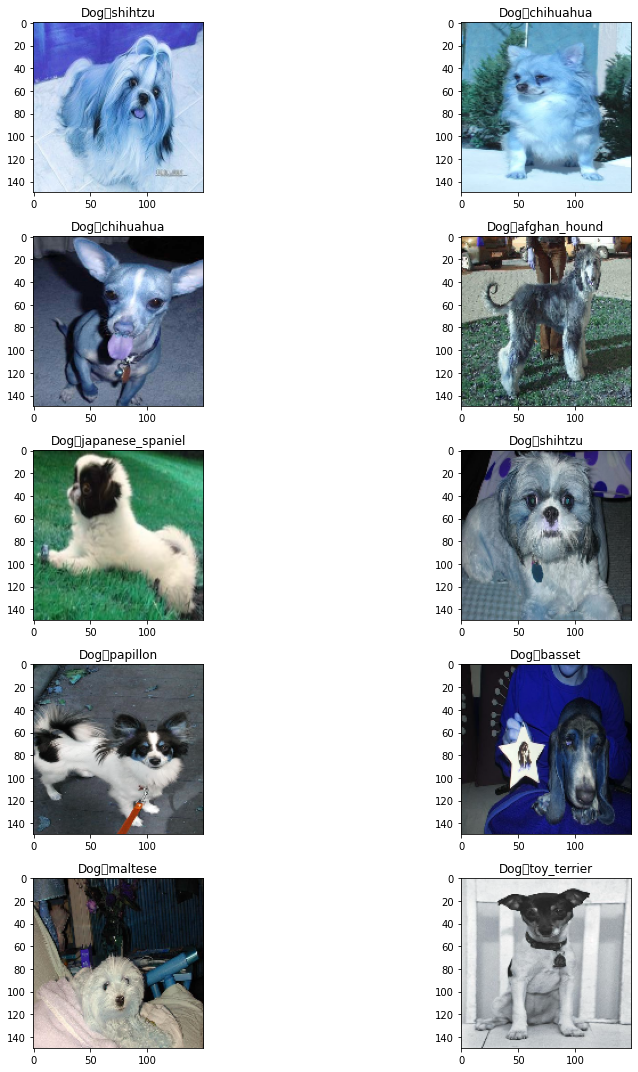

In [7]:
import matplotlib.pyplot as plt # 导入matplotlib
import random as rdm # 导入随机数工具
# 随机显示几张可爱的狗狗图片吧
fig,ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        r = rdm.randint(0,len(X))
        ax[i,j].imshow(X[r])
        ax[i,j].set_title('Dog：'+y_label[r])
plt.tight_layout()

In [8]:
from sklearn.model_selection import train_test_split # 导入拆分工具
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**开始构建一个简单的卷积网络**

&emsp;&emsp;在下面的代码当中，我们对卷积网络进行了创建和一系列设置。\
&emsp;&emsp;可以从代码中看到特征图的深度在逐渐增加，从32增加到了128，特征图的大小则从150 * 150逐渐缩小。这是构建卷积网络的常见模式。\
&emsp;&emsp;因为需要的层类型比较多，所以我们没有逐一导入，而是直接导入了keras当中的所有层。我们简单地介绍一下这个卷积网络当中用到的各个层和超参数。\
&emsp;&emsp;Conv2D，它是2D卷积层，对平面图像进行卷积。卷积层的参数32（3，3），其中32是它的深度，也就是该层的卷积核的个数。也可以理解成通道数。后面（3，3）表示的是卷积窗口的大小，在第一个卷积层中还通过了input_shape=(150,150,3)去指定了输入特征图的形状。\
&emsp;&emsp;全部的卷积层都通过ReLU函数激活。\
&emsp;&emsp;其实还有其他类型的卷积层，比如用于处理时序卷积的一维卷积层Conv1D等等……\
&emsp;&emsp;MaxPooling2D，是最大池化层，一般会紧随着卷积层出现，通常采用了2 * 2的窗口，它的默认步幅是2。这是将特征图进行2倍下采样，也就是宽高特征各减半。\
&emsp;&emsp;这种卷积+池化的架构一般要重复几次，同时逐渐增加特征的深度。\
&emsp;&emsp;Flantten()，是展平层，将卷积操作的特征图展平之后，我们才能够输入全连接层进行进一步的处理。\
最后还有两个Dense，它们是全连接层。
   
    □ 第一个是普通的层，用来计算权重，确定分类，用ReLU函数激活。
    □ 第二个则是只负责输出 分类结果，因为是多分类，所以用SoftMax函数进行激活。
在网络编译的时候，需要选择合适的超参数。

    □ 损失函数的选择是categorical_crossentropy，也就是分类交叉熵，它适用于多分类问题，用以衡量两个概率分布之间的举例，使之最小化，让输出结果尽可能接近真实值。
    □ 优化器的选择是RMSProp。
    □ 评估指标为准确率acc，等价于accucary。

In [42]:
from keras import layers # 导入所有层
from keras import models # 导入所有模型
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32,(3,3),activation='relu', # 卷积
                     input_shape=(150,150,3)))
cnn.add(layers.MaxPooling2D((2,2))) # 最大池化
cnn.add(layers.Conv2D(64,(3,3),activation='relu')) # 卷积
cnn.add(layers.MaxPooling2D((2,2))) # 最大池化
cnn.add(layers.Conv2D(128,(3,3),activation='relu')) # 卷积
cnn.add(layers.MaxPooling2D((2,2))) # 最大池化
cnn.add(layers.Conv2D(128,(3,3),activation='relu')) # 卷积
cnn.add(layers.MaxPooling2D((2,2))) # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dense(512,activation='relu')) # 全连层
cnn.add(layers.Dense(10,activation='softmax')) # 分类输出
cnn.compile(loss='categorical_crossentropy', # 损失函数
           optimizer='RMSprop', # 优化器
           metrics=['acc']) # 评估指标

训练网络并且显示误差和准确率\
对网络进行训练（为了简化模型，这里还是直接使用训练集数据进行验证）

In [10]:
history = cnn.fit(X_train,y_train, # 指定训练集
                 epochs=50,        # 指定轮次
                 batch_size=256,   # 指定批量大小
                 validation_data=(X_test,y_test)) # 指定验证集

Epoch 1/50
7/7 [==============================] - 34s 5s/step - loss: 3.2038 - acc: 0.1295 - val_loss: 3.7483 - val_acc: 0.0883
Epoch 2/50
7/7 [==============================] - 34s 5s/step - loss: 2.4978 - acc: 0.1269 - val_loss: 2.3027 - val_acc: 0.1195
Epoch 3/50
7/7 [==============================] - 33s 5s/step - loss: 2.2881 - acc: 0.1262 - val_loss: 2.5382 - val_acc: 0.0883
Epoch 4/50
7/7 [==============================] - 33s 5s/step - loss: 2.2995 - acc: 0.1483 - val_loss: 2.7046 - val_acc: 0.0883
Epoch 5/50
7/7 [==============================] - 33s 5s/step - loss: 2.3303 - acc: 0.1178 - val_loss: 2.4532 - val_acc: 0.0883
Epoch 6/50
7/7 [==============================] - 33s 5s/step - loss: 2.2426 - acc: 0.1327 - val_loss: 2.6136 - val_acc: 0.1351
Epoch 7/50
7/7 [==============================] - 33s 5s/step - loss: 2.2883 - acc: 0.1483 - val_loss: 2.4944 - val_acc: 0.0935
Epoch 8/50
7/7 [==============================] - 32s 5s/step - loss: 2.2431 - acc: 0.1906 - val_loss: 3

&emsp;&emsp;从上面的结果看，并不理想，网络基本上没有训练起来。验证集的准确率过低了！对于我们划分了10个类别的多分类问题来说，这样的结果跟我们闭着眼瞎猜差不多！\

## 卷积网络性能优化 ##
&emsp;&emsp;第一步，要更新优化器并设置学习速率\
从最简单的修改开始，暂时不改变网络结构，先考虑优化器的调整，并且尝试使用不同的学习速率进行梯度下降。因为很多时候神经网络完全没有训练起来，是因为学习速率设置的不好。请看如下代码：

**调整优化器**

In [17]:
# from keras import optimizers # 导入优化器
from tensorflow import optimizers
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32,(3,3),activation='relu', # 卷积
                     input_shape=(150,150,3)))
cnn.add(layers.MaxPooling2D((2,2))) # 最大池化
cnn.add(layers.Conv2D(64,(3,3),activation='relu')) # 卷积
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.MaxPooling2D((2,2))) # 最大池化
cnn.add(layers.Conv2D(128,(3,3),activation='relu')) # 卷积
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.MaxPooling2D((2,2))) # 最大池化
cnn.add(layers.Conv2D(256,(3,3),activation='relu')) # 卷积
cnn.add(layers.MaxPooling2D((2,2))) # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.Dense(512,activation='relu')) # 全连层
cnn.add(layers.Dense(10,activation='sigmoid')) # 分类输出
cnn.compile(loss='categorical_crossentropy', # 损失函数
           optimizer=optimizers.Adam(lr=1e-4), # 更新优化器并设定学习速率
           metrics=['acc']) # 评估指标
history = cnn.fit(X_train,y_train, # 指定训练集
                 epochs=50,        # 指定轮次
                 batch_size=256,   # 指定批量大小
                 validation_data=(X_test,y_test)) # 指定验证集

C:\Users\z6482\AppData\Roaming\Python\Python38\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
7/7 [==============================] - 33s 5s/step - loss: 2.3345 - acc: 0.1308 - val_loss: 2.2979 - val_acc: 0.0909
Epoch 2/50
7/7 [==============================] - 35s 5s/step - loss: 2.2767 - acc: 0.1347 - val_loss: 2.2898 - val_acc: 0.1714
Epoch 3/50
7/7 [==============================] - 35s 5s/step - loss: 2.2516 - acc: 0.1835 - val_loss: 2.2836 - val_acc: 0.1662
Epoch 4/50
7/7 [==============================] - 34s 5s/step - loss: 2.2380 - acc: 0.1861 - val_loss: 2.2772 - val_acc: 0.1948
Epoch 5/50
7/7 [==============================] - 35s 5s/step - loss: 2.2326 - acc: 0.1789 - val_loss: 2.2753 - val_acc: 0.1766
Epoch 6/50
7/7 [==============================] - 35s 5s/step - loss: 2.2195 - acc: 0.1744 - val_loss: 2.2717 - val_acc: 0.1818
Epoch 7/50
7/7 [==============================] - 36s 5s/step - loss: 2.2269 - acc: 0.1490 - val_loss: 2.2659 - val_acc: 0.1948
Epoch 8/50
7/7 [==============================] - 35s 5s/step - loss: 2.2056 - acc: 0.1802 - val_loss: 2

## 数据增强 ##
&emsp;&emsp;下面我们要对卷积网络处理问题的性能进改善，会用到**数据增强**（data augmentation）。
这种方法肯定能够进一步提高计算机视觉问题的准确率，同时降低它的过拟合。\
&emsp;&emsp;数据增强，能够把一张图像当成7张8张甚至100张来使用，也就是会在现有的数据样本中生成更多的训练数据。\
&emsp;&emsp;它是怎么做到的呢？是通过对图像的平移，颠倒，倾斜，虚化，增加噪声等多种手段来实现的。这是利用了能够生成可信图像的随机变化来增加样本数。这样一来，训练集就被大幅度地增加了，不管是图像的数目，还是多样性都会有显著增加。因此，在模型训练后，能够观察到数据的更多内容，从而具有更好的准确率和泛化能力。\
&emsp;&emsp;在keras当中，可以用ImageData-Generator工具来定义一个数据增强器。

In [18]:
# 定义一个数据增强器，并设定各种增强选项
from keras.preprocessing.image import ImageDataGenerator
augs_gen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=10,
            zoom_range=0.1,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=False)
augs_gen.fit(X_train) # 针对训练集拟合数据增强器

这里的网络还是用相同的网络，唯一的区别在于训练的时候，需要通过fit_generator方法动态生成被增强后的训练集

In [20]:
history = cnn.fit_generator( # 使用fit_generator
    augs_gen.flow(X_train,y_train,batch_size=16), # 增强后的训练集
    validation_data=(X_test,y_test), # 指定验证集
    validation_steps=100, # 指定验证步长
    steps_per_epoch=100, # 指定每轮步长
    epochs = 50, # 指定轮次
    verbose = 1) # 指定是否显示训练过程中的信息

Epoch 1/50
100/100 [==============================] - 39s 388ms/step - loss: 2.0398 - acc: 0.2882 - val_loss: 2.1351 - val_acc: 0.2753


下面的步骤，我们将神经网络模型（包括了训练好的权重和参数等）保存到一个文件里面，方便随时读取。

In [21]:
from keras.models import load_model # 导入模型保存工具
cnn.save("./my_dog_cnn.h5") # 创建一个HDF5格式的文件'my_dog——cnn.h5'
del cnn #删除当前模型
cnn = load_model("./my_dog_cnn.h5") #重新载入已经保存的模型

&emsp;&emsp;总结一下，深度神经网络的性能优化是非常大的一个课题！在这两个项目当中的优化实际上只是给了大家一个基本的思路！此外，我们还可以考虑的方向包括了一下的几种：

    ■ 增加或减少网络层数。
    ■ 尝试不同的优化器和正则化方法。
    ■ 尝试不同的激活函数和损失函数。

## 绘制特征通道 ##
就是卷积网络中特征通道的可视化！

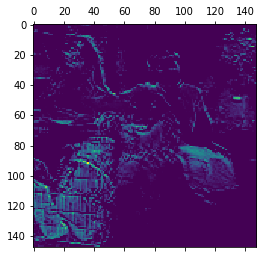

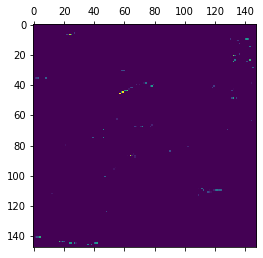

In [46]:
from keras.models import load_model # 导入模型保存工具
import matplotlib.pyplot as plt # 导入matplotlib
model = load_model('./my_dog_cnn.h5') # 载入刚才保存的模型
# 绘制特征通道
layer_outputs = [layer.output for layer in model.layers[:16]]
image = X_train[1]
image = image.reshape(1,150,150,3)
activation_model = models.Model(inputs=model.input,outputs=layer_outputs)
activation = activation_model.predict(image)
first_layer_activation = activation[0]
plt.matshow(first_layer_activation[0,:,:,2],cmap='viridis')
plt.matshow(first_layer_activation[0,:,:,3],cmap='viridis')

In [1]:
# for image in X_train:
#     image = image.reshape(1,150,150,3)
#     activation_model = models.Model(inputs=model.input,outputs=layer_outputs)
#     activation = activation_model.predict(image)
#     first_layer_activation = activation[0]
#     plt.matshow(first_layer_activation[0,:,:,2],cmap='viridis')
#     plt.matshow(first_layer_activation[0,:,:,3],cmap='viridis')

## 各种大型卷积网络模型 ##
&emsp;&emsp;上面的图像识别的分类的项目告一段落了。\
&emsp;&emsp;但是在这里要多说一点科普性的内容。\
&emsp;&emsp;卷积网络的“始祖”是AlexNet，在imageNet挑战赛上他曾经一举夺魁，成为深度学习热潮当中的开拓则。\
&emsp;&emsp;自打他2012年夺冠到现在，数据科学家们构建出了一个接一个的大型卷积网络模型，这些网络结构上越来越好，预测更加的准确，速度更快，而且通常大型的网络都有着更为复杂的拓扑结构。

### VGGNet ###
&emsp;&emsp;Visual Geometry Group-牛津大学计算机视觉组 和 Google DeepMind公司仪一起研发出的深度卷积神经网络模型VGGNet，这个模型在某个比赛当中也曾经取得了第一名的成绩，第二名是GoogleNet。\
&emsp;&emsp;VGGNet探索了卷积神经网络的深度与性能之间的关系，成功地构建了16~19层深度的卷积网络，证明了增加网络的深度能够在一定程度上影响网络最终的性能，使错误率大幅度减小。同时，它的拓扑性很强，迁移到其他图像数据上的泛化性也很好。到目前为止，VGGNet仍然被用来提取图像特征。\
&emsp;&emsp;VGGNet可以看成是加深版本的AlexNet，都是由卷积层，全连接层两个大的部分构成的，关于它的架构，我们简单说一下。

这个经典的卷积网络的架构，包括了以下的特点。

    1）结构简介。VGGNet由5层卷积层，3层全连接层，1层SoftMax输出层构成。层和层之间使用最大化池层分开，所有隐层的激活单元都采用了ReLU函数。
    2）小卷积核和多卷积子层。VGGNet使用了多个较小的卷积核（3*3）的卷积层代替一个较大卷积核的卷积层，这样做一方面可以减少参数，另一方面相当于进行了更多的非线性映射，可以增加网络的拟合能力。
    3）小池化核。相比AlexNet的3*3的池化核，VGGNet全部采用了2*2的池化核。
    4）通道数多。VGGNet第一层的通道数为64，后面每一层都进行了翻倍，最多的时候达到了512个通道。通道数的增加，使得更多的信息可以被提取出来。
    5）层数更深，特征图更宽。由于卷积核专注于扩大通道数，池化核专注于缩小宽度和高度。使得模型架构上更深，更宽的同时，控制了计算量的增加规模。
&emsp;&emsp;后来很多的卷积网络在设计的时候，都借鉴了VGGNet。\
&emsp;&emsp;我们这次在上面所作的案例，实际上它的架构也和VGGNet如出一辙。
### 采用Inception结构的GoogleNet ###
&emsp;&emsp;新型的Inception或者ResNet，比起经典的VGGNet性能更加的优越。其中，Inception的速度更快，ResNet的准确率更高。\
&emsp;&emsp;GoogleNet，采用的就是Inception结构，也是在2014年左右提出的一种新的深度学习结构。之前的AlexNet、VGGNet等结构都是通过单纯的增加网络的深度（层数）来提高准确率，由此带来的副作用，包括了过拟合，梯度消失，梯度爆炸等等。Inception通过模块串联来更高效的利用计算资源，在相同的计算量下能够提取到更多的特征，从而提升训练结果。\
&emsp;&emsp;Inception模块的基本架构，整个Inception结构由多个Inception模块由多个inception模块串联起来的。它的结构的主要贡献有两个：一个是使用1×1的卷积来进行升降降维，二是使用不同尺寸的卷积核同时进行卷积再聚合。
### 残差网络ResNet ###
&emsp;&emsp;VGGNet和GoogleNet都说明了一个道理：足够的深度是神经网络模型表现得更良好的前提。但是在网络达到一定的深度之后，简单地堆叠网络反而使效果变差了，这是由于梯度消失和过拟合造成的。\
&emsp;&emsp;进一步解决方案就是以前提到过的残差连接结构，我们通过创建较前面层和较后面层之间的捷径，解决了深度网络中的梯度消失问题。在构建卷积网络的过程中，残差连接结构构造出来的ResNet可以进一步地提高图像处理的准确率。\
&emsp;&emsp;残差网络增加了一个恒等映射（identity mapping），把当前输出直接传输给下一层网络。相当于走了一个捷径，跳过了本层运算，同时在反向传播过程当中，也是将下一层网络的梯度直接传递给上一层网络，这样就能够解决深层网络的梯度消失问题。\
&emsp;&emsp;这些大型卷积网络还有一个非常大的优点：它学到的知识使可以迁移的。也就是说，一个训练好的大型卷积网络可以迁移到我们的新模型上面，来解决我们的问题。那么如何实现这种神经网络之间的知识迁移呢？这里我们暂时不提。

下面我们总结一下卷积网络的特点：
    
    ■ 局部连续，减少参数，提升效率。
    ■ 通过特征提取把整体特征分解成小特征
    ■ 小特征具有平移不变性，因此出现的各个位置均能够被识别。
    ■ 通过空间层级将深度特征组合，形成整体特征。
    ■ 卷积的原则：抠图，卷积核对抠下来的图进行运算。
    ■ 填充和步幅。
    ■ 池化层的功能是对特征图进行下采样。
&emsp;&emsp;我们说卷积网络是计算机视觉处理的“利器”，在目前计算机视觉相关的项目实践当中，绝大多数情况都可以看见卷积网络的身影。我们之前就是通过一个小型卷积网络，实现了对10种不同品种狗的图像的分类。在这个过程当中，我们用多种方式对网络进行了优化。\
&emsp;&emsp;我们最后还介绍了一种将卷积网络特征通道可是化的方法，以及几种大型卷积网络模型。